In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

4431872/4422102 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

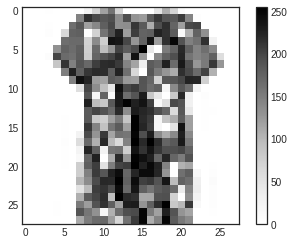

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

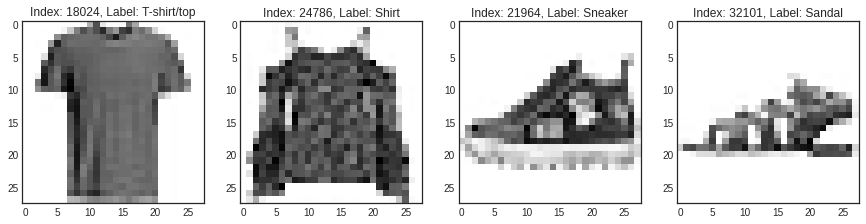

In [6]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [8]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [9]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [10]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [11]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 5s 8ms/step - loss: 2.1862 - accuracy: 0.3536 - val_loss: 2.0282 - val_accuracy: 0.4264
Epoch 2/60
83/83 [==============================] - 0s 4ms/step - loss: 1.9132 - accuracy: 0.5778 - val_loss: 1.8035 - val_accuracy: 0.5625
Epoch 3/60
83/83 [==============================] - 0s 4ms/step - loss: 1.7121 - accuracy: 0.6435 - val_loss: 1.6258 - val_accuracy: 0.6262
Epoch 4/60
83/83 [==============================] - 0s 4ms/step - loss: 1.5529 - accuracy: 0.6745 - val_loss: 1.4823 - val_accuracy: 0.6684
Epoch 5/60
83/83 [==============================] - 0s 4ms/step - loss: 1.4261 - accuracy: 0.6897 - val_loss: 1.3740 - val_accuracy: 0.6736
Epoch 6/60
83/83 [==============================] - 0s 4ms/step - loss: 1.3245 - accuracy: 0.7008 - val_loss: 1.2846 - val_accuracy: 0.6875
Epoch 7/60
83/83 [==============================] - 0s 4ms/step - loss: 1.2421 - accuracy: 0.7091 - val_loss: 1.2038 - val_accuracy: 0.7122
Epoch 8/60
83/83 [==

In [17]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

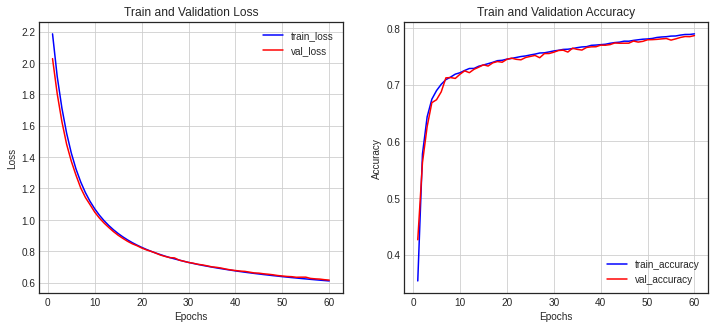

In [18]:
show_history(history)

In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6279 - accuracy: 0.7819


[0.6279057860374451, 0.7818999886512756]

In [20]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

[1.4679286e-02 9.3619317e-01 4.4591813e-03 1.6312478e-02 2.0020781e-02
 4.1570540e-05 8.1711719e-03 3.4973640e-05 7.1327442e-05 1.6139746e-05]
1
Trouser


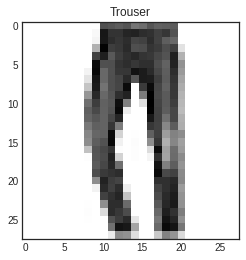

In [21]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [22]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [23]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

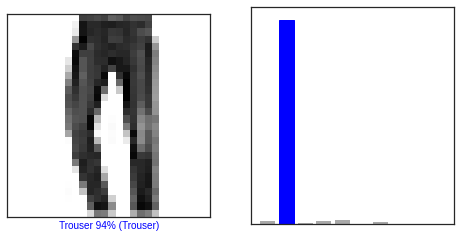

In [24]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

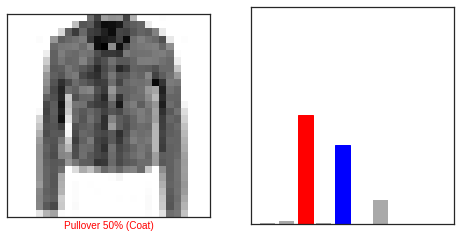

In [25]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

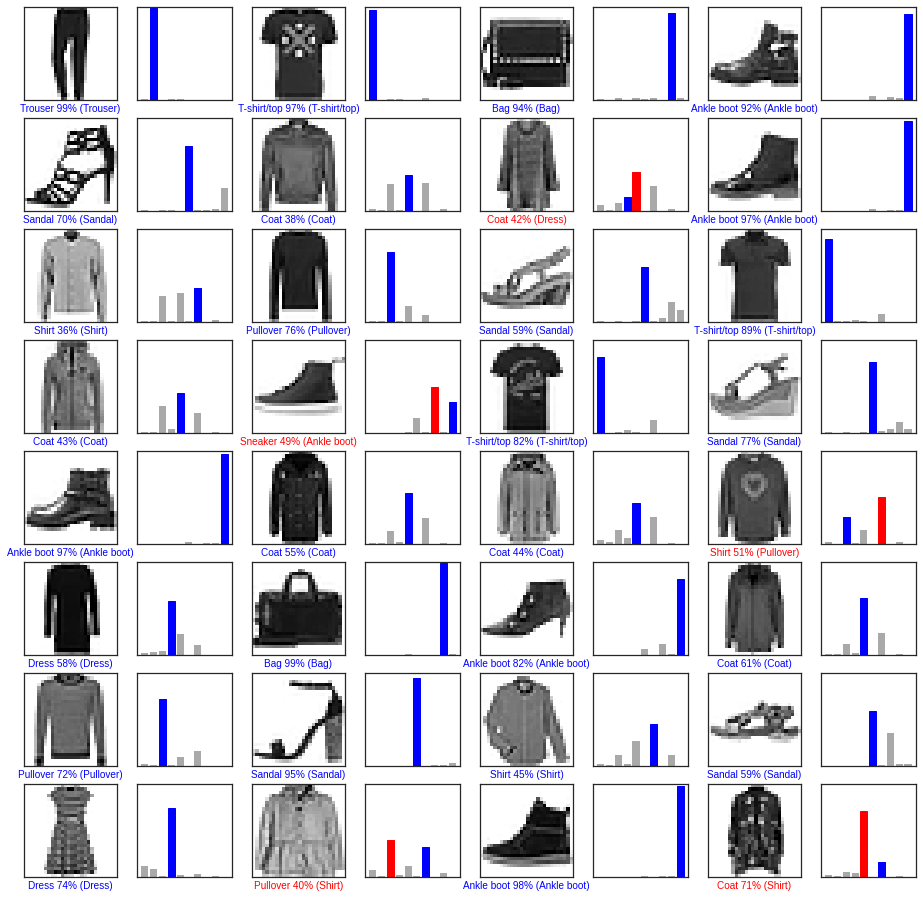

In [26]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [27]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.78      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.70      0.61      0.65      1000
       Dress       0.75      0.84      0.79      1000
        Coat       0.66      0.72      0.69      1000
      Sandal       0.84      0.85      0.85      1000
       Shirt       0.49      0.43      0.46      1000
     Sneaker       0.86      0.83      0.85      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.87      0.93      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



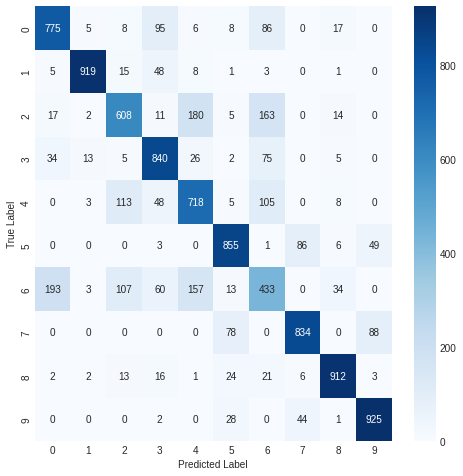

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5956 - accuracy: 0.7927 - val_loss: 0.5892 - val_accuracy: 0.7923
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5677 - accuracy: 0.8019 - val_loss: 0.5661 - val_accuracy: 0.8049
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5468 - accuracy: 0.8088 - val_loss: 0.5479 - val_accuracy: 0.8088
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5299 - accuracy: 0.8154 - val_loss: 0.5326 - val_accuracy: 0.8174
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5171 - accuracy: 0.8193 - val_loss: 0.5216 - val_accuracy: 0.8190
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5059 - accuracy: 0.8235 - val_loss: 0.5211 - val_accuracy: 0.8168
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4965 - accuracy: 0.8258 - val_loss: 0.5060 - val_accuracy:

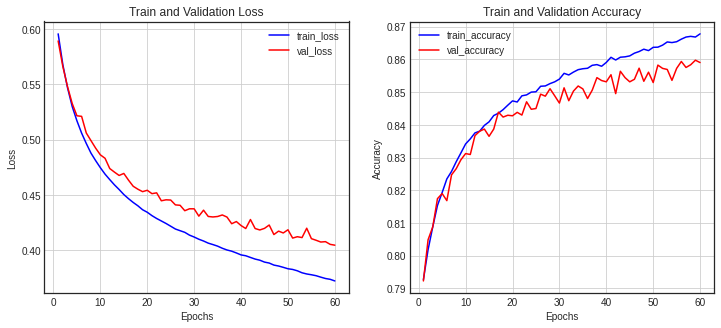

In [30]:
show_history(history)

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8462


[0.4239771068096161, 0.8461999893188477]

In [32]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [35]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7823 - accuracy: 0.7501 - val_loss: 0.5836 - val_accuracy: 0.8057
Epoch 2/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.5323 - accuracy: 0.8217 - val_loss: 0.5177 - val_accuracy: 0.8250
Epoch 3/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4807 - accuracy: 0.8358 - val_loss: 0.4753 - val_accuracy: 0.8398
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4531 - accuracy: 0.8436 - val_loss: 0.4554 - val_accuracy: 0.8441
Epoch 5/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4328 - accuracy: 0.8512 - val_loss: 0.4536 - val_accuracy: 0.8432
Epoch 6/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4180 - accuracy: 0.8564 - val_loss: 0.4412 - val_accuracy: 0.8484
Epoch 7/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4053 - accuracy: 0.8599 - val_loss: 0.4243 - val_accuracy:

In [36]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

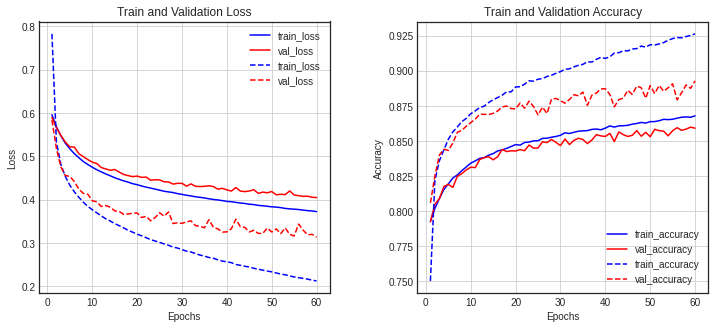

In [37]:
diff_history(history, history2)

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3359 - accuracy: 0.8777


[0.3359174132347107, 0.8776999711990356]

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [40]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3816 - accuracy: 0.8653 - val_loss: 0.4508 - val_accuracy: 0.8363
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3305 - accuracy: 0.8780 - val_loss: 0.3448 - val_accuracy: 0.8780
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3051 - accuracy: 0.8868 - val_loss: 0.3714 - val_accuracy: 0.8704
Epoch 4/60
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2877 - accuracy: 0.8937 - val_loss: 0.3855 - val_accuracy: 0.8625
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2725 - accuracy: 0.8983 - val_loss: 0.3365 - val_accuracy: 0.8841
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2620 - accuracy: 0.9020 - val_loss: 0.3692 - val_accuracy: 0.8746
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2502 - accuracy: 0.9055 - val_loss: 0.3370 - val_accuracy:

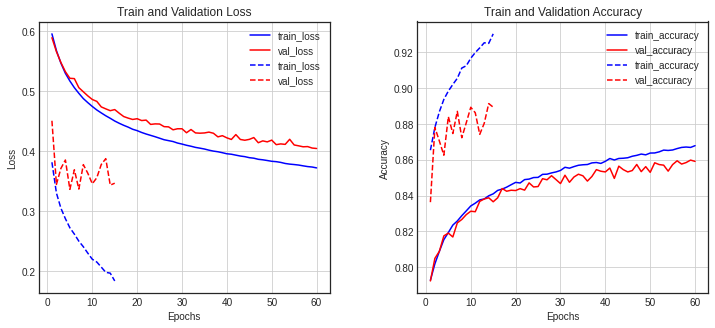

In [41]:
diff_history(history, history3)

In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8715


[0.3666530251502991, 0.8715000152587891]

In [49]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [51]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7726 - accuracy: 0.8118 - val_loss: 0.5970 - val_accuracy: 0.8330
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5570 - accuracy: 0.8390 - val_loss: 0.5744 - val_accuracy: 0.8271
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5189 - accuracy: 0.8478 - val_loss: 0.4986 - val_accuracy: 0.8574
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4968 - accuracy: 0.8548 - val_loss: 0.4834 - val_accuracy: 0.8596
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4770 - accuracy: 0.8575 - val_loss: 0.4681 - val_accuracy: 0.8634
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4675 - accuracy: 0.8590 - val_loss: 0.4899 - val_accuracy: 0.8517
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4516 - accuracy: 0.8657 - val_loss: 0.4734 - val_accuracy:

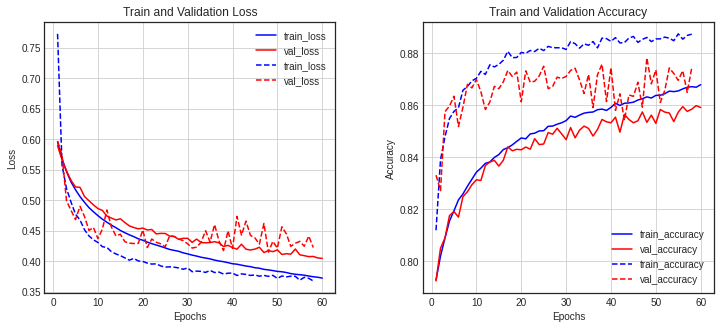

In [52]:
diff_history(history, history4)

In [53]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [55]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6142 - accuracy: 0.7774 - val_loss: 0.4532 - val_accuracy: 0.8337
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4563 - accuracy: 0.8345 - val_loss: 0.4098 - val_accuracy: 0.8523
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4165 - accuracy: 0.8488 - val_loss: 0.3965 - val_accuracy: 0.8510
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3909 - accuracy: 0.8553 - val_loss: 0.3700 - val_accuracy: 0.8662
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3729 - accuracy: 0.8630 - val_loss: 0.3639 - val_accuracy: 0.8686
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3575 - accuracy: 0.8685 - val_loss: 0.3579 - val_accuracy: 0.8688
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3466 - accuracy: 0.8713 - val_loss: 0.3507 - val_accuracy:

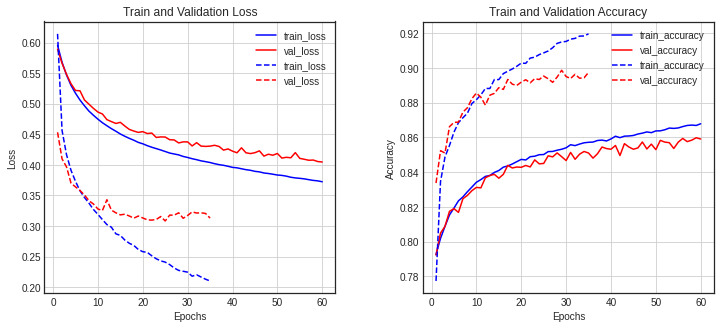

In [56]:
diff_history(history, history5)

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8880


[0.3313649594783783, 0.8880000114440918]

In [59]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [60]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [61]:
history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.5179 - accuracy: 0.8174 - val_loss: 0.4670 - val_accuracy: 0.8304
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4130 - accuracy: 0.8520 - val_loss: 0.4258 - val_accuracy: 0.8427
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3724 - accuracy: 0.8643 - val_loss: 0.4339 - val_accuracy: 0.8454
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3418 - accuracy: 0.8749 - val_loss: 0.3817 - val_accuracy: 0.8666
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3169 - accuracy: 0.8829 - val_loss: 0.3725 - val_accuracy: 0.8658
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2958 - accuracy: 0.8915 - val_loss: 0.3965 - val_accuracy: 0.8567
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2765 - accuracy: 0.8976 - val_loss: 0.3658 - val_accuracy:

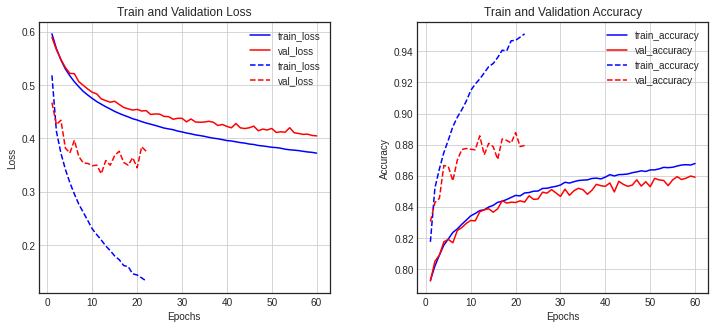

In [62]:
diff_history(history, history6)

In [63]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3592 - accuracy: 0.8754


[0.35916295647621155, 0.8754000067710876]

In [64]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [65]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [66]:
history7 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.6182 - accuracy: 0.7824 - val_loss: 0.4469 - val_accuracy: 0.8427
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4971 - accuracy: 0.8213 - val_loss: 0.4665 - val_accuracy: 0.8320
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4569 - accuracy: 0.8337 - val_loss: 0.4187 - val_accuracy: 0.8493
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4260 - accuracy: 0.8442 - val_loss: 0.4012 - val_accuracy: 0.8572
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4059 - accuracy: 0.8528 - val_loss: 0.3963 - val_accuracy: 0.8569
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3894 - accuracy: 0.8567 - val_loss: 0.3882 - val_accuracy: 0.8630
Epoch 7/60
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8630 - val_loss: 0.3928 - val_accuracy:

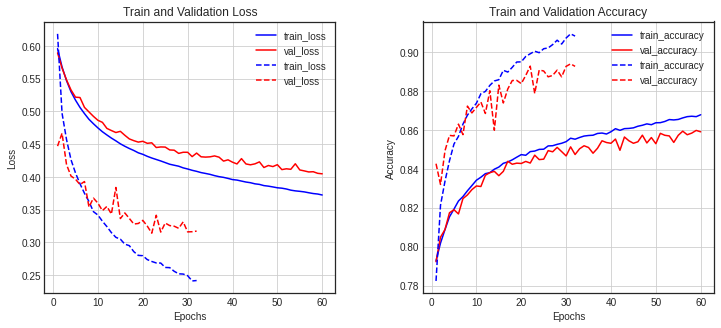

In [67]:
diff_history(history, history7)

In [68]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8856


[0.33694782853126526, 0.8855999708175659]

In [71]:
pred_ys = model.predict(x_test)

In [72]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.80      0.78      0.79      1000
       Dress       0.86      0.92      0.89      1000
        Coat       0.78      0.84      0.81      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.74      0.67      0.70      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



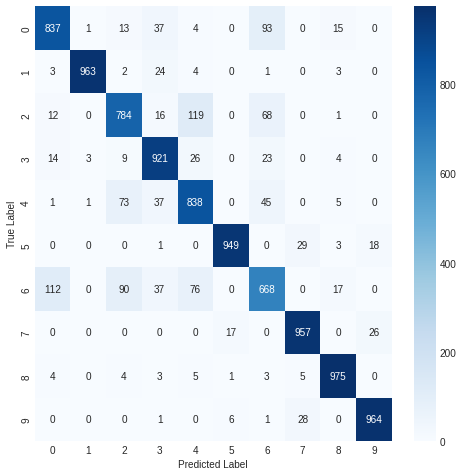

In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()